In [67]:
from __future__ import print_function, division
import requests
import datetime
from datetime import datetime, timedelta
import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from scipy import special

Import Lists of Academy Award winning directors and actors

In [2]:
actor_list = {"actor": ["Emil Jannings", "Richard Barthelmess", "Warner Baxter", "The Cisco Kid", "George Bancroft", "Chester Morris", "Paul Muni", "Lewis Stone", "Count Pahlen", "George Arliss", "George Arliss", "Wallace Beery", "Maurice Chevalier", "Ronald Colman", "Capt. Hugh \"Bulldog\" Drummond", "Lawrence Tibbett", "Lionel Barrymore", "Jackie Cooper", "Richard Dix", "Fredric March", "Adolphe Menjou", "Wallace Beery", "Fredric March", 
                    "Dr. Henry Jekyll / Mr. Edward Hyde", "Alfred Lunt", "Charles Laughton", "King Henry VIII of England", "Leslie Howard", "Paul Muni", "Clark Gable", "Frank Morgan", "Alessandro \u2013 Duke of Florence", "William Powell", "Nick Charles", "Victor McLaglen", "Clark Gable", "Lieutenant Fletcher Christian", "Charles Laughton", "Captain William Bligh", "Franchot Tone", "Midshipman", "Roger Byam", "Paul Muni", "Paul Muni", 
                    "Louis Pasteur", "Gary Cooper", "Walter Huston", "William Powell", "Spencer Tracy", "Spencer Tracy", "Charles Boyer", "Emperor Napoleon Bonaparte", "Fredric March", "Robert Montgomery", "Paul Muni", "\u00c9mile Zola", "Spencer Tracy", "Father Flanagan", "Charles Boyer", "James Cagney", "Robert Donat", "Leslie Howard", "Robert Donat", "Clark Gable", "Rhett Butler", "Laurence Olivier", "Mickey Rooney", "James Stewart", 
                    "James Stewart", "Charlie Chaplin", "Henry Fonda", "Tom Joad", "Raymond Massey", "Abraham Lincoln", "Laurence Olivier", "Gary Cooper", "Cary Grant", "Walter Huston", "Robert Montgomery", "Orson Welles", "Charles Foster Kane", "James Cagney", "George M. Cohan", "Ronald Colman", "Gary Cooper", "Lou Gehrig", "Walter Pidgeon", "Monty Woolley", "Paul Lukas", "Humphrey Bogart", "Gary Cooper", "Walter Pidgeon", "Pierre Curie",
                    "Mickey Rooney", "Bing Crosby", "Charles Boyer", "Barry Fitzgerald", "Cary Grant", "Alexander Knox", "Woodrow Wilson", "Ray Milland", "Bing Crosby", "Gene Kelly", "Gregory Peck", "Cornel Wilde", "Fr\u00e9d\u00e9ric Chopin", "Fredric March", "Laurence Olivier", "King Henry V of England", "Larry Parks", "Al Jolson", "Gregory Peck", "James Stewart", "George Bailey", "Ronald Colman", "John Garfield", "Gregory Peck", "William Powell", 
                    "Michael Redgrave", "Laurence Olivier", "Lew Ayres", "Montgomery Clift", "Dan Dailey", "Clifton Webb", "Lynn Aloysius Belvedere", "Broderick Crawford", "Kirk Douglas", "Gregory Peck", "Richard Todd", "John Wayne", "Jos\u00e9 Ferrer", "Cyrano de Bergerac", "Louis Calhern", "Oliver Wendell Holmes", "William Holden", "James Stewart", "Spencer Tracy", "Humphrey Bogart", "Marlon Brando", "Stanley Kowalski", "Montgomery Clift", "Arthur Kennedy", 
                    "Fredric March", "Willy Loman", "Gary Cooper", "Marshal Will Kane", "Marlon Brando", "Emiliano Zapata", "Kirk Douglas", "Jos\u00e9 Ferrer", "Alec Guinness", "William Holden", "Marlon Brando", "Mark Antony", "Richard Burton", "Montgomery Clift", "Burt Lancaster", "Marlon Brando", "Humphrey Bogart", "Bing Crosby", "James Mason", "Dan O'Herlihy", "Ernest Borgnine", "James Cagney", "Martin Snyder", "James Dean", "Frank Sinatra", "Spencer Tracy", 
                    "Yul Brynner", "King Mongkut of Siam", "James Dean", "Kirk Douglas", "Vincent van Gogh", "Rock Hudson", "Laurence Olivier", "King Richard III of England", "Alec Guinness", "Marlon Brando", "Anthony Franciosa", "Charles Laughton", "Anthony Quinn", "David Niven", "Tony Curtis", "Paul Newman", "Sidney Poitier", "Spencer Tracy", "Charlton Heston", "Judah Ben-Hur", "Laurence Harvey", "Jack Lemmon", "Paul Muni", "James Stewart", "Burt Lancaster", 
                    "Trevor Howard", "Jack Lemmon", "Laurence Olivier", "Spencer Tracy", "Maximilian Schell", "Charles Boyer", "Paul Newman", "Spencer Tracy", "Stuart Whitman", "Gregory Peck", "Atticus Finch", "Burt Lancaster", "Robert Franklin Stroud", "Jack Lemmon", "Marcello Mastroianni", "Peter O'Toole", "T. E. Lawrence", "Sidney Poitier", "Albert Finney", "Richard Harris", "Rex Harrison", "Julius Caesar", "Paul Newman", "Rex Harrison", "Richard Burton", 
                    "Thomas Becket", "Peter O'Toole", "King Henry II of England", "Anthony Quinn", "Peter Sellers", "Lee Marvin", "Richard Burton", "Laurence Olivier", "Rod Steiger", "Oskar Werner", "Paul Scofield", "Sir Thomas More", "Alan Arkin", "Richard Burton", "Michael Caine", "Steve McQueen", "Rod Steiger", "Warren Beatty", "Clyde Barrow", "Dustin Hoffman", "Paul Newman", "Spencer Tracy", "Cliff Robertson", "Alan Arkin", "Alan Bates", "Ron Moody", 
                    "Peter O'Toole", "King Henry II of England", "John Wayne", "Reuben \"Rooster\" Cogburn", "Richard Burton", "King Henry VIII of England", "Dustin Hoffman", "Peter O'Toole", "Jon Voight", "George C. Scott", "General George S. Patton Jr.", "Melvyn Douglas", "James Earl Jones", "Jack Jefferson", "Jack Nicholson", "Ryan O'Neal", "Gene Hackman", "Detective Jimmy \"Popeye\" Doyle", "Peter Finch", "Walter Matthau", "George C. Scott", "Tevye", 
                    "Marlon Brando", "Vito Corleone", "Michael Caine", "Laurence Olivier", "Peter O'Toole", "Paul Winfield", "Jack Lemmon", "Marlon Brando", "Jack Nicholson", "Al Pacino", "Frank Serpico", "Robert Redford", "Art Carney", "Albert Finney", "Hercule Poirot", "Dustin Hoffman", "Lenny Bruce", "Jack Nicholson", "Al Pacino", "Michael Corleone", "Jack Nicholson", "Randle Patrick \"Mac\" McMurphy", "Walter Matthau", "Al Pacino", "Sonny Wortzik", 
                    "Maximilian Schell", "James Whitmore", "Harry S. Truman", "Peter Finch", "Howard Beale", "Robert De Niro", "Travis Bickle", "Giancarlo Giannini", "William Holden", "Sylvester Stallone", "Rocky Balboa", "Richard Dreyfuss", "Woody Allen", "Richard Burton", "Marcello Mastroianni", "John Travolta", "Jon Voight", "Warren Beatty", "Gary Busey", "Buddy Holly", "Robert De Niro", "Laurence Olivier", "Dustin Hoffman", "Jack Lemmon", "Al Pacino", 
                    "...And Justice for All", "Roy Scheider", "Peter Sellers", "Robert De Niro", "Jake LaMotta", "Robert Duvall", "John Hurt", "John Merrick", "Jack Lemmon", "Peter O'Toole", "Henry Fonda", "Warren Beatty", "John Silas \"Jack\" Reed", "Burt Lancaster", "Dudley Moore", "Paul Newman", "Ben Kingsley", "Mohandas Karamchand Gandhi", "Dustin Hoffman", "Jack Lemmon", "Paul Newman", "Peter O'Toole", "Robert Duvall", "Michael Caine", "Tom Conti", 
                    "Tom Courtenay", "Albert Finney", "F. Murray Abraham", "Antonio Salieri", "Jeff Bridges", "Albert Finney", "Tom Hulce", "Wolfgang Amadeus Mozart", "Sam Waterston", "Sydney Schanberg", "William Hurt", "Harrison Ford", "James Garner", "Jack Nicholson", "Jon Voight", "Paul Newman", "Dexter Gordon", "Bob Hoskins", "William Hurt", "James Woods", "Michael Douglas", "Gordon Gekko", "William Hurt", "Marcello Mastroianni", "Jack Nicholson", 
                    "Francis Phelan", "Robin Williams", "Adrian Cronauer", "Dustin Hoffman", "Gene Hackman", "Tom Hanks", "Edward James Olmos", "Jaime Escalante", "Max von Sydow", "Daniel Day-Lewis", "Christy Brown", "Kenneth Branagh", "King Henry V of England", "Tom Cruise", "Ron Kovic", "Morgan Freeman", "Robin Williams", "Jeremy Irons", "Kevin Costner", "Robert De Niro", "G\u00e9rard Depardieu", "Cyrano de Bergerac", "Richard Harris", "Anthony Hopkins", 
                    "Warren Beatty", "Benjamin \"Bugsy\" Siegel", "Robert De Niro", "Maximilian \"Max\" Cady", "Nick Nolte", "Robin Williams", "Al Pacino", "Robert Downey Jr.", "Charlie Chaplin", "Clint Eastwood", "Stephen Rea", "Denzel Washington", "Tom Hanks", "Daniel Day-Lewis", "Gerry Conlon", "Laurence Fishburne", "Ike Turner", "Anthony Hopkins", "Liam Neeson", "Oskar Schindler", "Tom Hanks", "Forrest Gump", "Morgan Freeman", "Nigel Hawthorne", 
                    "King George III", "Paul Newman", "John Travolta", "Nicolas Cage", "Richard Dreyfuss", "Anthony Hopkins", "Richard Nixon", "Sean Penn", "Matthew Poncelet", "Massimo Troisi", "Geoffrey Rush", "David Helfgott", "Tom Cruise", "Ralph Fiennes", "Count L\u00e1szl\u00f3 de Alm\u00e1sy", "Woody Harrelson", "Larry Flynt", "Billy Bob Thornton", "Jack Nicholson", "Matt Damon", "Robert Duvall", "Peter Fonda", "Dustin Hoffman", "Roberto Benigni", 
                    "Tom Hanks", "Ian McKellen", "James Whale", "Nick Nolte", "Edward Norton", "Kevin Spacey", "Russell Crowe", "Jeffrey Wigand", "Richard Farnsworth", "Alvin Straight", "Sean Penn", "Denzel Washington", "Rubin \"The Hurricane\" Carter", "Russell Crowe", "Javier Bardem", "Reinaldo Arenas", "Tom Hanks", "Ed Harris", "Jackson Pollock", "Geoffrey Rush", "The Marquis de Sade", "Denzel Washington", "Detective Alonzo Harris", "Russell Crowe", 
                    "John Forbes Nash Jr.", "Sean Penn", "Will Smith", "Muhammad Ali", "Tom Wilkinson", "Adrien Brody", "W\u0142adys\u0142aw Szpilman", "Nicolas Cage", "Charlie Kaufman", "Michael Caine", "Daniel Day-Lewis", "William \"Bill the Butcher\" Cutting", "Jack Nicholson", "Sean Penn", "Johnny Depp", "Captain Jack Sparrow", "Ben Kingsley", "Jude Law", "Bill Murray", "Jamie Foxx", "Ray Charles", "Don Cheadle", "Paul Rusesabagina", "Johnny Depp", 
                    "J. M. Barrie", "Leonardo DiCaprio", "Howard Hughes", "Clint Eastwood", "Philip Seymour Hoffman", "Truman Capote", "Terrence Howard", "Heath Ledger", "Ennis Del Mar", "Joaquin Phoenix", "Johnny Cash", "David Strathairn", "Edward R. Murrow", "Forest Whitaker", "Idi Amin", "Leonardo DiCaprio", "Ryan Gosling", "Peter O'Toole", "Will Smith", "Chris Gardner", "Daniel Day-Lewis", "George Clooney", "Johnny Depp", "Sweeney Todd / Benjamin Barker", 
                    "Tommy Lee Jones", "Viggo Mortensen", "Sean Penn", "Harvey Milk", "Richard Jenkins", "Frank Langella", "Richard Nixon", "Brad Pitt", "Mickey Rourke", "Jeff Bridges", "George Clooney", "Colin Firth", "Morgan Freeman", "Nelson Mandela", "Jeremy Renner", "Colin Firth", "King George VI", "Javier Bardem", "Jeff Bridges", "Reuben \"Rooster\" Cogburn", "Jesse Eisenberg", "Mark Zuckerberg", "James Franco", "Aron Ralston", "Jean Dujardin", 
                    "Demi\u00e1n Bichir", "George Clooney", "Gary Oldman", "George Smiley", "Brad Pitt", "Billy Beane", "Daniel Day-Lewis", "Abraham Lincoln", "Bradley Cooper", "Hugh Jackman", "Jean Valjean", "Joaquin Phoenix", "Denzel Washington", "Matthew McConaughey", "Ron Woodroof", "Christian Bale", "Irving Rosenfeld", "Bruce Dern", "Leonardo DiCaprio", "Jordan Belfort", "Chiwetel Ejiofor", "Solomon Northup", 
                    "Eddie Redmayne", "Stephen Hawking", "Steve Carell", "John du Pont", "Bradley Cooper", "Chris Kyle", "Benedict Cumberbatch", "Alan Turing", "Michael Keaton", "Leonardo DiCaprio", "Hugh Glass", "Bryan Cranston", "Dalton Trumbo", "Matt Damon", "Michael Fassbender", "Steve Jobs", "Eddie Redmayne", "Lili Elbe", "Casey Affleck", "Andrew Garfield", "Desmond Doss", "Ryan Gosling", "Viggo Mortensen", "Denzel Washington"]}

actress_list = {"actress": ["Janet Gaynor", "Louise Dresser", "Gloria Swanson", "Mary Pickford", "Ruth Chatterton", "Betty Compson", "Jeanne Eagels", "Corinne Griffith", "Bessie Love", "Norma Shearer", "The Divorcee", "Nancy Carroll", "Ruth Chatterton", "Greta Garbo", "Norma Shearer", "Gloria Swanson", "Marie Dressler", "Marlene Dietrich", "Irene Dunne", "Ann Harding", "Norma Shearer", "Helen Hayes", "Marie Dressler", "Lynn Fontanne", "Katharine Hepburn", 
                            "May Robson", "Diana Wynyard", "Claudette Colbert", "Grace Moore", "Norma Shearer", "Elizabeth Barrett", "Bette Davis", "Bette Davis", "Elisabeth Bergner", "Claudette Colbert", "Katharine Hepburn", "Miriam Hopkins", "Becky Sharp", "Merle Oberon", "Luise Rainer", "Anna Held", "Irene Dunne", "Gladys George", "Carole Lombard", "Norma Shearer", "Luise Rainer", "Irene Dunne", "Greta Garbo", "Janet Gaynor", "Barbara Stanwyck", "Bette Davis", 
                            "Fay Bainter", "Wendy Hiller", "Eliza Doolittle", "Norma Shearer", "Marie Antoinette", "Margaret Sullavan", "Vivien Leigh", "Scarlett O'Hara", "Bette Davis", "Irene Dunne", "Greta Garbo", "Greer Garson", "Ginger Rogers", "Bette Davis", "Joan Fontaine", "Katharine Hepburn", "Martha Scott", "Joan Fontaine", "Bette Davis", "Olivia de Havilland", "Greer Garson", "Edna Gladney", "Barbara Stanwyck", "Greer Garson", "Kay Miniver", "Bette Davis", 
                            "Katharine Hepburn", "Rosalind Russell", "Ruth Sherwood", "Teresa Wright", "Eleanor Twitchell Gehrig", "Jennifer Jones", "Bernadette Soubirous", "Jean Arthur", "Ingrid Bergman", "Joan Fontaine", "Greer Garson", "Marie Curie", "Ingrid Bergman", "Claudette Colbert", "Bette Davis", "Greer Garson", "Barbara Stanwyck", "Phyllis Dietrichson", "Joan Crawford", "Ingrid Bergman", "Greer Garson", "Jennifer Jones", "Gene Tierney", "Olivia de Havilland", 
                            "Celia Johnson", "Jennifer Jones", "Rosalind Russell", "Elizabeth Kenny", "Jane Wyman", "Loretta Young", "Joan Crawford", "Susan Hayward", "Angelica Evans Conway", "Dorothy McGuire", "Rosalind Russell", "Jane Wyman", "Ingrid Bergman", "Olivia de Havilland", "Virginia Stuart Cunningham", "Irene Dunne", "Barbara Stanwyck", "Olivia de Havilland", "Jeanne Crain", "Susan Hayward", "Deborah Kerr", "Loretta Young", "Judy Holliday", "Anne Baxter", 
                            "Bette Davis", "Eleanor Parker", "Gloria Swanson", "Vivien Leigh", "Blanche DuBois", "Katharine Hepburn", "Eleanor Parker", "Shelley Winters", "Alice Tripp", "Jane Wyman", "Shirley Booth", "Joan Crawford", "Bette Davis", "The Star", "Julie Harris", "Susan Hayward", "Jane Froman", "Audrey Hepburn", "Leslie Caron", "Ava Gardner", "Deborah Kerr", "Maggie McNamara", "Grace Kelly", "Dorothy Dandridge", "Judy Garland", "Audrey Hepburn", "Jane Wyman", 
                            "Anna Magnani", "Susan Hayward", "Lillian Roth", "Katharine Hepburn", "Jennifer Jones", "Han Suyin", "Eleanor Parker", "Ingrid Bergman", "Anna Koreff", "Anastasia", "Carroll Baker", "Katharine Hepburn", "Nancy Kelly", "Deborah Kerr", "Anna Leonowens", "Joanne Woodward", "Eve White / Eve Black / Jane", "Deborah Kerr", "Anna Magnani", "Elizabeth Taylor", "Lana Turner", "Constance MacKenzie", "Susan Hayward", "Barbara Graham", "Deborah Kerr", 
                            "Shirley MacLaine", "Rosalind Russell", "Elizabeth Taylor", "Simone Signoret", "Doris Day", "Audrey Hepburn", "Gabrielle van der Mal", "Katharine Hepburn", "Elizabeth Taylor", "Elizabeth Taylor", "Greer Garson", "Eleanor Roosevelt", "Deborah Kerr", "Shirley MacLaine", "Melina Mercouri", "Sophia Loren", "Audrey Hepburn", "Piper Laurie", "Geraldine Page", "Natalie Wood", "Anne Bancroft", "Annie Sullivan", "Bette Davis", "Baby Jane Hudson", 
                            "Katharine Hepburn", "Mary Cavan Tyrone", "Geraldine Page", "Lee Remick", "Patricia Neal", "Leslie Caron", "Shirley MacLaine", "Rachel Roberts", "Natalie Wood", "Julie Andrews", "Mary Poppins", "Anne Bancroft", "Jo Armitage", "Sophia Loren", "Debbie Reynolds", "Molly Brown", "Kim Stanley", "Julie Christie", "Julie Andrews", "Maria von Trapp", "Samantha Eggar", "Elizabeth Hartman", "Simone Signoret", "Elizabeth Taylor", "Anouk Aim\u00e9e", 
                            "Ida Kami\u0144ska", "Lynn Redgrave", "Vanessa Redgrave", "Katharine Hepburn", "Anne Bancroft", "Faye Dunaway", "Bonnie Parker", "Edith Evans", "Audrey Hepburn", "Katharine Hepburn", "Barbra Streisand", "Fanny Brice", "Patricia Neal", "Vanessa Redgrave", "Isadora Duncan", "Joanne Woodward", "Maggie Smith", "Jean Brodie", "Genevi\u00e8ve Bujold", "Anne Boleyn", "Jane Fonda", "Liza Minnelli", "Jean Simmons", "Glenda Jackson", "Jane Alexander", 
                            "Ali MacGraw", "Sarah Miles", "Carrie Snodgress", "Bettina \"Tina\" Balser", "Jane Fonda", "Julie Christie", "Glenda Jackson", "Vanessa Redgrave", "Janet Suzman", "Empress Alexandra of Russia", "Liza Minnelli", "Sally Bowles", "Diana Ross", "Billie Holiday", "Maggie Smith", "Cicely Tyson", "Liv Ullmann", "Glenda Jackson", "Ellen Burstyn", "Marsha Mason", "Barbra Streisand", "Joanne Woodward", "Ellen Burstyn", "Alice Graham-Hyatt", "Diahann Carroll", 
                            "Faye Dunaway", "Valerie Perrine", "Harriett Jolliff / Honey Bruce", "Gena Rowlands", "Louise Fletcher", "Nurse Mildred Ratched", "Isabelle Adjani", "Ad\u00e8le Hugo / Ad\u00e8le Lewly", "Glenda Jackson", "Carol Kane", "Faye Dunaway", "Marie-Christine Barrault", "Talia Shire", "Adrian Pennino", "Sissy Spacek", "Carrie White", "Liv Ullmann", "Diane Keaton", "Anne Bancroft", "Emma Jacklin", "Jane Fonda", "Lillian Hellman", "Shirley MacLaine", "Deedee Rodgers", 
                            "Marsha Mason", "Jane Fonda", "Ingrid Bergman", "Ellen Burstyn", "Jill Clayburgh", "Geraldine Page", "Sally Field", "Norma Rae Webster", "Jill Clayburgh", "Jane Fonda", "Marsha Mason", "Bette Midler", "Sissy Spacek", "Loretta Lynn", "Ellen Burstyn", "Goldie Hawn", "Mary Tyler Moore", "Gena Rowlands", "Katharine Hepburn", "Diane Keaton", "Louise Bryant", "Marsha Mason", "Susan Sarandon", "Meryl Streep", "Meryl Streep", "Julie Andrews", "Jessica Lange", "Frances Farmer", 
                            "Sissy Spacek", "Beth Horman", "Debra Winger", "Shirley MacLaine", "Jane Alexander", "Meryl Streep", "Karen Silkwood", "Julie Walters", "Debra Winger", "Sally Field", "Judy Davis", "Jessica Lange", "Vanessa Redgrave", "Sissy Spacek", "Geraldine Page", "Anne Bancroft", "Whoopi Goldberg", "Celie Harris-Johnson", "Jessica Lange", "Patsy Cline", "Meryl Streep", "Karen Blixen", "Marlee Matlin", "Jane Fonda", "Sissy Spacek", "Kathleen Turner", "Sigourney Weaver", "Ellen Ripley", 
                            "Cher", "Glenn Close", "Holly Hunter", "Jane Craig", "Sally Kirkland", "Meryl Streep", "Jodie Foster", "Sarah Tobias", "Glenn Close", "Melanie Griffith", "Meryl Streep", "Lindy Chamberlain", "Sigourney Weaver", "Dian Fossey", "Jessica Tandy", "Isabelle Adjani", "Camille Claudel", "Pauline Collins", "Jessica Lange", "Michelle Pfeiffer", "Kathy Bates", "Annie Wilkes", "Anjelica Huston", "Julia Roberts", "Meryl Streep", "Suzanne Vale", "Joanne Woodward", "India Bridge", "Jodie Foster", 
                            "Clarice Starling", "Geena Davis", "Laura Dern", "Bette Midler", "Susan Sarandon", "Emma Thompson", "Catherine Deneuve", "Mary McDonnell", "Michelle Pfeiffer", "Susan Sarandon", "Michaela Murphy Odone", "Holly Hunter", "Angela Bassett", "Anna Mae Bullock / Tina Turner", "Stockard Channing", "Louisa \"Ouisa\" Kittredge", "Emma Thompson", "Debra Winger", "Joy Davidman", "Jessica Lange", "Jodie Foster", "Nell Kellty", "Miranda Richardson", "Vivienne Haigh-Wood", "Winona Ryder", 
                            "Josephine \"Jo\" March", "Susan Sarandon", "Susan Sarandon", "Helen Prejean", "Elisabeth Shue", "Sharon Stone", "Ginger McKenna", "Meryl Streep", "Emma Thompson", "Elinor Dashwood", "Frances McDormand", "Marge Gunderson", "Brenda Blethyn", "Diane Keaton", "Kristin Scott Thomas", "Emily Watson", "Helen Hunt", "Helena Bonham Carter", "Julie Christie", "Judi Dench", "Queen Victoria", "Kate Winslet", "Gwyneth Paltrow", "Viola de Lesseps / Thomas Kent", "Cate Blanchett", "Fernanda Montenegro", 
                            "Meryl Streep", "Kate Gulden", "Emily Watson", "Jacqueline du Pr\u00e9", "Hilary Swank", "Brandon Teena", "Annette Bening", "Janet McTeer", "Julianne Moore", "Sarah Miles", "Meryl Streep", "Roberta Guaspari", "Julia Roberts", "Erin Brockovich", "Joan Allen", "Juliette Binoche", "Ellen Burstyn", "Laura Linney", "Halle Berry", "Judi Dench", "Iris Murdoch", "Nicole Kidman", "Sissy Spacek", "Ren\u00e9e Zellweger", "Bridget Jones", "Nicole Kidman", "Virginia Woolf", "Salma Hayek", "Frida Kahlo", 
                            "Diane Lane", "Julianne Moore", "Ren\u00e9e Zellweger", "Roxie Hart", "Charlize Theron", "Aileen Wuornos", "Keisha Castle-Hughes", "Diane Keaton", "Samantha Morton", "Naomi Watts", "Hilary Swank", "Annette Bening", "Catalina Sandino Moreno", "Imelda Staunton", "Kate Winslet", "Reese Witherspoon", "June Carter Cash", "Judi Dench", "Laura Forster-Henderson", "Felicity Huffman", "Keira Knightley", "Elizabeth Bennet", "Charlize Theron", "Josey Aimes", "Helen Mirren", "Queen Elizabeth II", 
                            "Pen\u00e9lope Cruz", "Judi Dench", "Meryl Streep", "Miranda Priestly", "Kate Winslet", "Marion Cotillard", "\u00c9dith Piaf", "Cate Blanchett", "Queen Elizabeth I", "Julie Christie", "Laura Linney", "Ellen Page", "Kate Winslet", "Anne Hathaway", "Angelina Jolie", "Christine Collins", "Melissa Leo", "Meryl Streep", "Sandra Bullock", "Leigh Anne Tuohy", "Helen Mirren", "Sophia Tolstaya", "Carey Mulligan", "Jenny Mellor", "Gabourey Sidibe", "Meryl Streep", "Julia Child", "Natalie Portman", 
                            "Annette Bening", "Nicole Kidman", "Jennifer Lawrence", "Michelle Williams", "Meryl Streep", "Margaret Thatcher", "Glenn Close", "Viola Davis", "Rooney Mara", "Lisbeth Salander", "Michelle Williams", "Marilyn Monroe", "Jennifer Lawrence", "Jessica Chastain", "Emmanuelle Riva", "Quvenzhan\u00e9 Wallis", "Naomi Watts", "Maria Bennett", "Cate Blanchett", "Amy Adams", "Sandra Bullock", "Judi Dench", "Philomena Lee", "Meryl Streep", "Julianne Moore", "Marion Cotillard", "Felicity Jones", 
                            "Jane Wilde-Hawking", "Rosamund Pike", "Reese Witherspoon", "Cheryl Strayed", "Brie Larson", "Cate Blanchett", "Jennifer Lawrence", "Joy Mangano", "Charlotte Rampling", "Saoirse Ronan", "Emma Stone", "Isabelle Huppert", "Ruth Negga", "Mildred Loving", 
                            "Natalie Portman", "Jackie Kennedy", "Meryl Streep", "Florence Foster Jenkins"]}

director_list = {"director": ["Frank Borzage", "Herbert Brenon", "King Vidor", "The Crowd", "Lewis Milestone", "Ted Wilde", "Frank Lloyd", "The Divine Lady", "Lionel Barrymore", "Harry Beaumont", "Irving Cummings", "Frank Lloyd", "Ernst Lubitsch", "The Patriot", "Lewis Milestone", "Clarence Brown", "Robert Z. Leonard", "The Divorcee", "Ernst Lubitsch", "The Love Parade", "King Vidor", "Norman Taurog", "Clarence Brown", "A Free Soul", "Lewis Milestone", "The Front Page", "Wesley Ruggles", "Josef von Sternberg", "Frank Borzage", 
                         "King Vidor", "The Champ", "Josef von Sternberg", "Frank Lloyd", "Frank Capra", "George Cukor", "Frank Capra", "Victor Schertzinger", "W. S. Van Dyke", "The Thin Man", "John Ford", "The Informer", "Henry Hathaway", "The Lives of a Bengal Lancer", "Frank Lloyd", "Frank Capra", "Gregory La Cava", "Robert Z. Leonard", "The Great Ziegfeld", "W. S. Van Dyke", "William Wyler", "Leo McCarey", "The Awful Truth", "William Dieterle", "The Life of Emile Zola", "Sidney Franklin", "The Good Earth", "Gregory La Cava", 
                         "William A. Wellman", "A Star Is Born", "Frank Capra", "Michael Curtiz", "Norman Taurog", "King Vidor", "The Citadel", "Victor Fleming", "Frank Capra", "John Ford", "Sam Wood", "William Wyler", "John Ford", "The Grapes of Wrath", "George Cukor", "The Philadelphia Story", "Alfred Hitchcock", "Sam Wood", "William Wyler", "The Letter", "John Ford", "Alexander Hall", "Howard Hawks", "Orson Welles", "William Wyler", "The Little Foxes", "William Wyler", "Michael Curtiz", "John Farrow", "Mervyn LeRoy", "Sam Wood", 
                         "Michael Curtiz", "Clarence Brown", "The Human Comedy", "Henry King", "The Song of Bernadette", "Ernst Lubitsch", "George Stevens", "The More the Merrier", "Leo McCarey", "Alfred Hitchcock", "Henry King", "Otto Preminger", "Billy Wilder", "Billy Wilder", "The Lost Weekend", "Clarence Brown", "Alfred Hitchcock", "Leo McCarey", "The Bells of St. Mary's", "Jean Renoir", "The Southerner", "William Wyler", "The Best Years of Our Lives", "Clarence Brown", "The Yearling", "Frank Capra", "David Lean", "Robert Siodmak", 
                         "The Killers", "Elia Kazan", "George Cukor", "Edward Dmytryk", "Henry Koster", "David Lean", "John Huston", "Anatole Litvak", "Jean Negulesco", "Laurence Olivier", "Fred Zinnemann", "Joseph L. Mankiewicz", "Carol Reed", "Robert Rossen", "William A. Wellman", "William Wyler", "Joseph L. Mankiewicz", "George Cukor", "John Huston", "Carol Reed", "Billy Wilder", "George Stevens", "John Huston", "Elia Kazan", "Vincente Minnelli", "William Wyler", "John Ford", "Cecil B. DeMille", "John Huston", "Joseph L. Mankiewicz", 
                         "Fred Zinnemann", "Fred Zinnemann", "George Stevens", "Charles Walters", "Billy Wilder", "William Wyler", "Elia Kazan", "Alfred Hitchcock", "George Seaton", "William A. Wellman", "Billy Wilder", "Delbert Mann", "Elia Kazan", "David Lean", "Joshua Logan", "John Sturges", "George Stevens", "Michael Anderson", "Walter Lang", "King Vidor", "William Wyler", "David Lean", "Joshua Logan", "Sidney Lumet", "Mark Robson", "Billy Wilder", "Vincente Minnelli", "Richard Brooks", "Stanley Kramer", "Mark Robson", "Robert Wise", 
                         "William Wyler", "Jack Clayton", "George Stevens", "Billy Wilder", "Fred Zinnemann", "Billy Wilder", "Jack Cardiff", "Jules Dassin", "Alfred Hitchcock", "Fred Zinnemann", "Robert Wise", "Jerome Robbins", "Federico Fellini", "Stanley Kramer", "Robert Rossen", "J. Lee Thompson", "David Lean", "Pietro Germi", "Robert Mulligan", "Arthur Penn", "Frank Perry", "Tony Richardson", "Federico Fellini", "Elia Kazan", "Otto Preminger", "Martin Ritt", "George Cukor", "Michael Cacoyannis", "Peter Glenville", "Stanley Kubrick",
                        "Robert Stevenson", "Robert Wise", "David Lean", "John Schlesinger", "Hiroshi Teshigahara", "William Wyler", "Fred Zinnemann", "Michelangelo Antonioni", "Richard Brooks", "Claude Lelouch", "Mike Nichols", "Mike Nichols", "Richard Brooks", "Norman Jewison", "Stanley Kramer", "Arthur Penn", "Carol Reed", "Anthony Harvey", "Stanley Kubrick", "Gillo Pontecorvo", "Franco Zeffirelli", "John Schlesinger", "Costa Gavras", "George Roy Hill", "Arthur Penn", "Sydney Pollack", "Franklin J. Schaffner", "Robert Altman", 
                        "Federico Fellini", "Arthur Hiller", "Ken Russell", "William Friedkin", "Peter Bogdanovich", "Norman Jewison", "Stanley Kubrick", "John Schlesinger", "Bob Fosse", "John Boorman", "Francis Ford Coppola", "Joseph L. Mankiewicz", "Jan Troell", "George Roy Hill", "Ingmar Bergman", "Bernardo Bertolucci", "William Friedkin", "George Lucas", "Francis Ford Coppola", "John Cassavetes", "Bob Fosse", "Roman Polanski", "Fran\u00e7ois Truffaut", "Milo\u0161 Forman", "Robert Altman", "Federico Fellini", "Stanley Kubrick", 
                         "Sidney Lumet", "John G. Avildsen", "Ingmar Bergman", "Sidney Lumet", "Alan J. Pakula", "Lina Wertm\u00fcller", "Woody Allen", "George Lucas", "Herbert Ross", "Steven Spielberg", "Fred Zinnemann", "Michael Cimino", "Woody Allen", "Hal Ashby", "Warren Beatty", "Buck Henry", "Alan Parker", "Robert Benton", "Francis Ford Coppola", "Bob Fosse", "\u00c9douard Molinaro", "Peter Yates", "Robert Redford", "David Lynch", "Roman Polanski", "Richard Rush", "Martin Scorsese", "Warren Beatty", "Hugh Hudson", "Louis Malle", 
                        "Mark Rydell", "Steven Spielberg", "Richard Attenborough", "Sidney Lumet", "Wolfgang Petersen", "Sydney Pollack", "Steven Spielberg", "James L. Brooks", "Bruce Beresford", "Ingmar Bergman", "Mike Nichols", "Peter Yates", "Milo\u0161 Forman", "Woody Allen", "Robert Benton", "Roland Joff\u00e9", "David Lean", "Sydney Pollack", "H\u00e9ctor Babenco", "John Huston", "Akira Kurosawa", "Peter Weir", "Oliver Stone", "Woody Allen", "James Ivory", "Roland Joff\u00e9", "David Lynch", "Bernardo Bertolucci", "John Boorman", 
                        "Lasse Hallstr\u00f6m", "Norman Jewison", "Adrian Lyne", "Barry Levinson", "Charles Crichton", "Mike Nichols", "Alan Parker", "Martin Scorsese", "Oliver Stone", "Woody Allen", "Kenneth Branagh", "Jim Sheridan", "Peter Weir", "Kevin Costner", "Francis Ford Coppola", "Stephen Frears", "Barbet Schroeder", "Martin Scorsese", "Jonathan Demme", "Barry Levinson", "Ridley Scott", "John Singleton", "Oliver Stone", "Clint Eastwood", "Robert Altman", "Martin Brest", "James Ivory", "Neil Jordan", "Steven Spielberg", "Robert Altman", 
                        "Jane Campion", "James Ivory", "Jim Sheridan", "Robert Zemeckis", "Woody Allen", "Krzysztof Kie\u015blowski", "Robert Redford", "Quentin Tarantino", "Mel Gibson", "Mike Figgis", "Chris Noonan", "Michael Radford", "Tim Robbins", "Anthony Minghella", "Joel Coen", "Milo\u0161 Forman", "Scott Hicks", "Mike Leigh", "James Cameron", "Peter Cattaneo", "Atom Egoyan", "Curtis Hanson", "Gus Van Sant", "Steven Spielberg", "Roberto Benigni", "John Madden", "Terrence Malick", "Peter Weir", "Sam Mendes", "Lasse Hallstr\u00f6m", "Spike Jonze", 
                        "Michael Mann", "M. Night Shyamalan", "Steven Soderbergh", "Stephen Daldry", "Ang Lee", "Ridley Scott", "Steven Soderbergh", "Ron Howard", "Robert Altman", "Peter Jackson", "David Lynch", "Ridley Scott", "Roman Polanski", "Pedro Almod\u00f3var", "Stephen Daldry", "Rob Marshall", "Martin Scorsese", "Peter Jackson", "Sofia Coppola", "Clint Eastwood", "Fernando Meirelles", "Peter Weir", "Clint Eastwood", "Taylor Hackford", "Mike Leigh", "Alexander Payne", "Martin Scorsese", "Ang Lee", "George Clooney", "Paul Haggis", "Bennett Miller", 
                        "Steven Spielberg", "Martin Scorsese", "Clint Eastwood", "Stephen Frears", "Paul Greengrass", "Alejandro Gonz\u00e1lez I\u00f1\u00e1rritu", "Joel Coen", "Ethan Coen", "Paul Thomas Anderson", "Tony Gilroy", "Jason Reitman", "Julian Schnabel", "Danny Boyle", "Stephen Daldry", "David Fincher", "Ron Howard", "Gus Van Sant", "Kathryn Bigelow", "James Cameron", "Lee Daniels", "Jason Reitman", "Quentin Tarantino", "Tom Hooper", "Darren Aronofsky", "Joel Coen", "Ethan Coen", "David Fincher", "David O. Russell", "Michel Hazanavicius", "Woody Allen", 
                        "Terrence Malick", "Alexander Payne", "Martin Scorsese", "Ang Lee", "Michael Haneke", "David O. Russell", "Steven Spielberg", "Benh Zeitlin", "Alfonso Cuar\u00f3n", "Steve McQueen", "Alexander Payne", "David O. Russell", "Martin Scorsese", "Alejandro G. I\u00f1\u00e1rritu", "Wes Anderson", "Richard Linklater", "Bennett Miller", "Morten Tyldum", "Alejandro G. I\u00f1\u00e1rritu", "Lenny Abrahamson", "Tom McCarthy", "Adam McKay", "George Miller", "Damien Chazelle", "Mel Gibson", "Barry Jenkins", "Kenneth Lonergan", "Denis Villeneuve"]}

Modify dataframe to include all categorical variables

In [3]:
IMDB = pd.read_json('IMDB.json')

IMDB['actor_nominee'] = IMDB.cast_list.apply(lambda x: int(bool(set(actor_list['actor']) & set(x))))
IMDB['actress_nominee'] = IMDB.cast_list.apply(lambda x: int(bool(set(actress_list['actress']) & set(x))))
IMDB['director_nominee'] = IMDB.cast_list.apply(lambda x: int(bool(set(director_list['director']) & set(x))))
IMDB.columns.values[5] = 'genres'
IMDB['drama'] = IMDB.genres.apply(lambda x: int(bool(set(['Drama']) & set(x))))
IMDB['comedy'] = IMDB.genres.apply(lambda x: int(bool(set(['Comedy']) & set(x))))
IMDB['romance'] = IMDB.genres.apply(lambda x: int(bool(set(['Romance']) & set(x))))
IMDB['biography'] = IMDB.genres.apply(lambda x: int(bool(set(['Biography']) & set(x))))
IMDB['sport'] = IMDB.genres.apply(lambda x: int(bool(set(['Sport']) & set(x))))
IMDB['thriller'] = IMDB.genres.apply(lambda x: int(bool(set(['Thriller']) & set(x))))
IMDB['crime'] = IMDB.genres.apply(lambda x: int(bool(set(['Crime']) & set(x))))
IMDB['adventure'] = IMDB.genres.apply(lambda x: int(bool(set(['Adventure']) & set(x))))
IMDB['num_voted_users'] = IMDB.num_voted_users.apply(lambda x: int(''.join(x.split(','))))
IMDB['ROI'] = IMDB['worldwide_income']/IMDB['budget']

In [4]:
IMDB_Test = IMDB[['worldwide_income','budget','imdb_score', 'duration_sorted']]

Generate Pairplot for some values

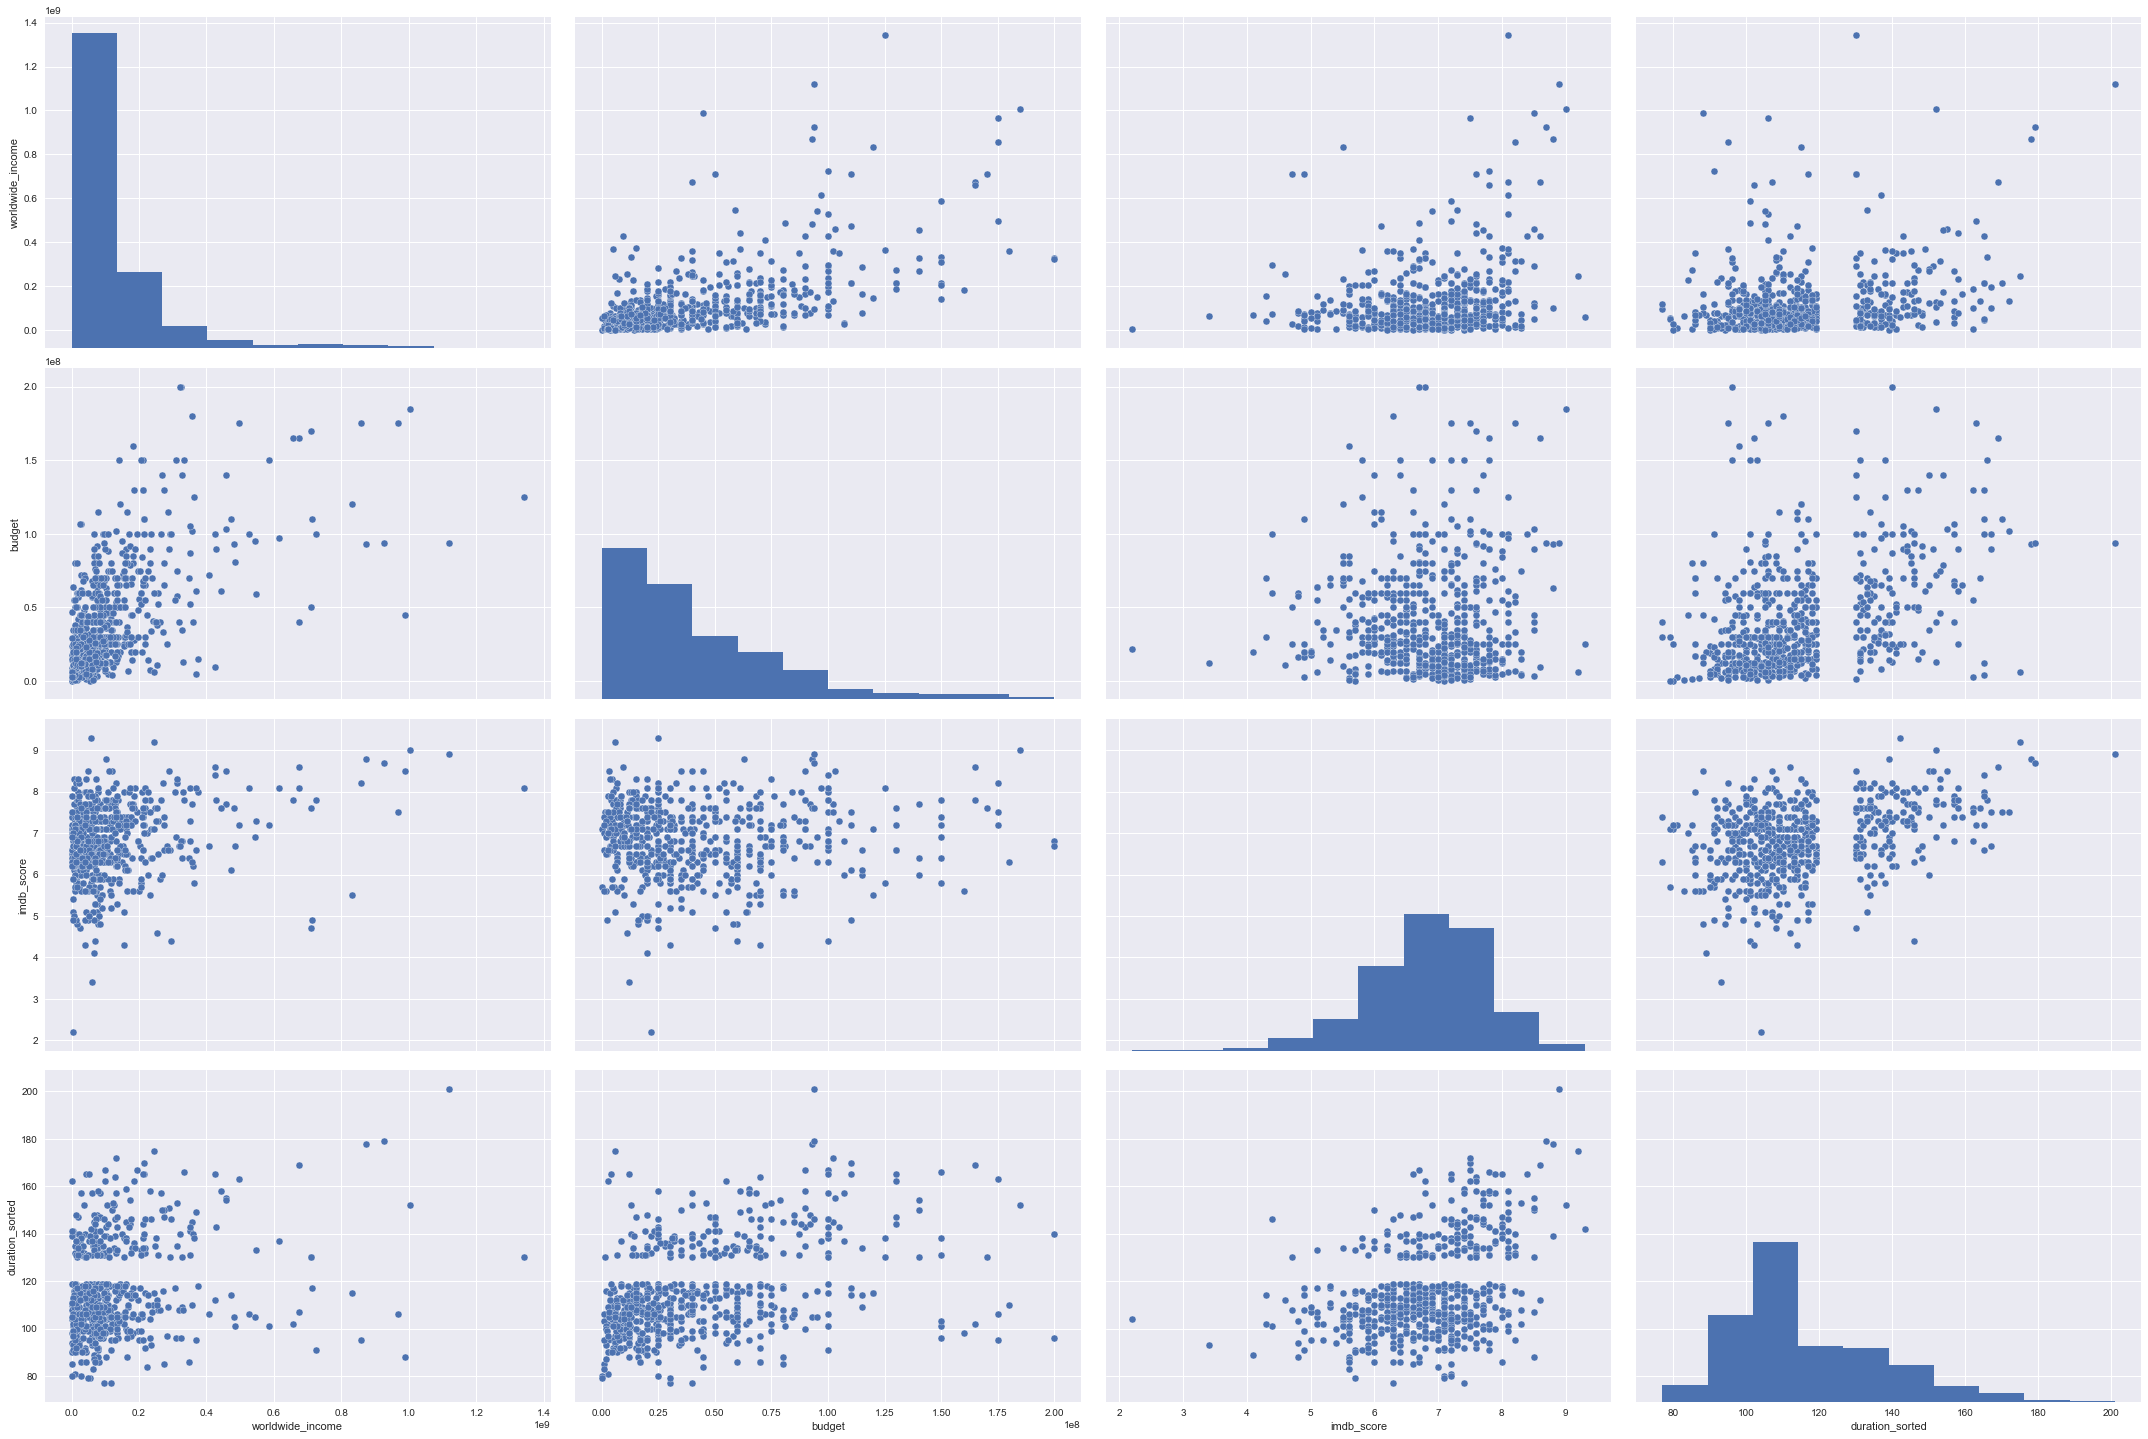

In [5]:
sns = sns.pairplot(IMDB_Test, size = 5, aspect=1.5)


Look at correlation between selected variables

In [6]:
IMDB_Test.corr()

,worldwide_income,budget,imdb_score,duration_sorted
worldwide_income,1.000000,0.592959,0.250037,0.273845
budget,0.592959,1.000000,0.040415,0.407622
imdb_score,0.250037,0.040415,1.000000,0.385121
duration_sorted,0.273845,0.407622,0.385121,1.000000


Look at first model with budget alone as dependent variable

In [7]:
stats_model = LinearRegression(fit_intercept=True)
X = IMDB[['budget']]
y = IMDB['worldwide_income'] 
stats_model.fit(X, y)
stats_model.score(X, y), stats_model.coef_


(0.35160061620755434, array([ 2.59382043]))

In [8]:
IMDB['pred_inc_bud'] = stats_model.predict(X)

Plot initial figures using budget as the independent variable

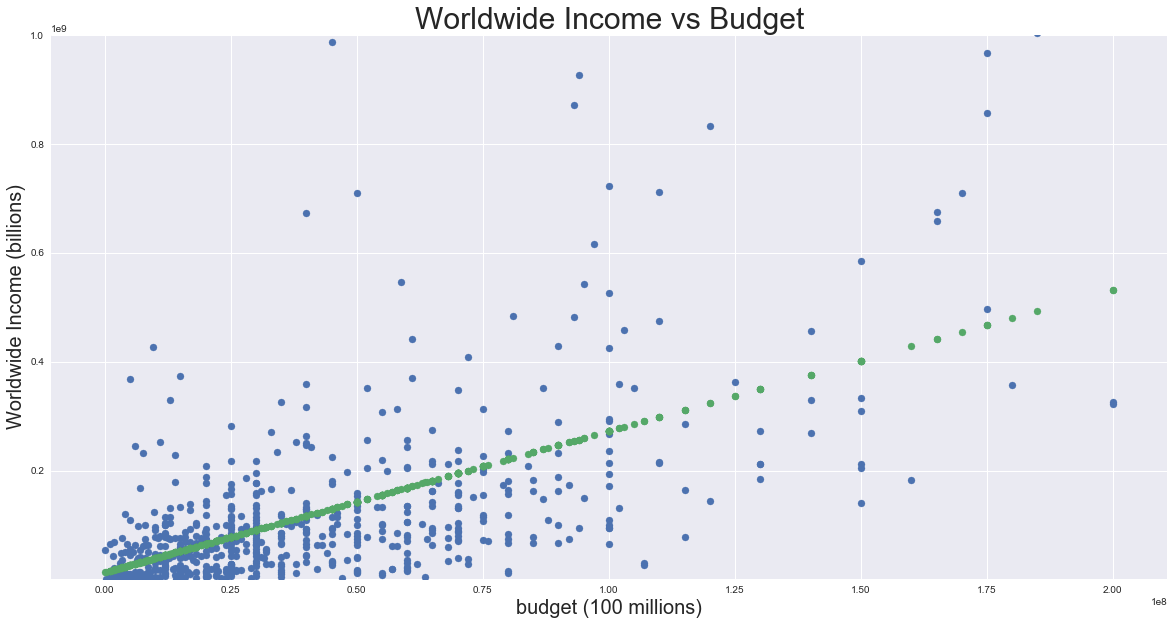

In [9]:
plt.figure(figsize = (20,10));
plt.scatter(x=IMDB.budget, y=IMDB.worldwide_income);
plt.scatter(x=IMDB.budget, y=IMDB.pred_inc_bud)
plt.ylabel('Worldwide Income (billions)', fontsize = 20);
plt.xlabel('budget (100 millions)', fontsize = 20);
plt.title('Worldwide Income vs Budget', fontsize = 30);
plt.ylim(1000000,1000000000,1000000)
scale_y = 1e3

Plot histogram of Worldwide Income

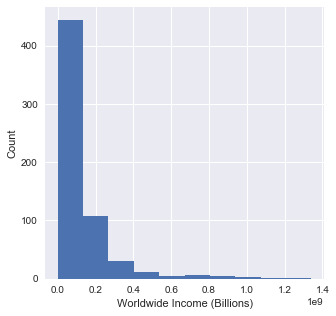

In [10]:
plt.figure(figsize = (5,5));
plt.hist(IMDB.worldwide_income);
plt.xlabel('Worldwide Income (Billions)');
plt.ylabel('Count');

Filter out outliers using ROI cap

In [11]:
sorted(IMDB['ROI'].values, reverse = True)

IMDB = IMDB[IMDB['ROI'] < 15];
IMDB = IMDB[IMDB['worldwide_income'] < 1200000000];

In [12]:
sorted(IMDB['ROI'].values, reverse = True);

Run second regression model having added categorical variables

In [13]:
stats_model2 = LinearRegression(fit_intercept=True)
X2 = IMDB[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography','romance','sport','thriller','crime','adventure']]
y2 = IMDB['worldwide_income'] 
stats_model2.fit(X2, y2);
stats_model2.score(X2, y2);

Add relationships between Budget and categorical features

In [14]:
IMDB['budget&director_nominee']=IMDB['budget']*IMDB['director_nominee']
IMDB['budget&actor_nominee']=IMDB['budget']*IMDB['actor_nominee']
IMDB['budget&actress_nominee']=IMDB['budget']*IMDB['actress_nominee']
IMDB['budget&comedy']=IMDB['budget']*IMDB['comedy']
IMDB['budget&biography']=IMDB['budget']*IMDB['biography']
IMDB['budget&romance']=IMDB['budget']*IMDB['romance']
IMDB['budget&sport']=IMDB['budget']*IMDB['sport']
IMDB['budget&thriller']=IMDB['budget']*IMDB['thriller']
IMDB['budget&crime']=IMDB['budget']*IMDB['crime']
IMDB['budget&adventure']=IMDB['budget']*IMDB['adventure']

In [15]:
stats_model3 = LinearRegression(fit_intercept=True)
X3 = IMDB[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography',
           'romance','sport','thriller','crime','adventure','budget&director_nominee',
           'budget&actor_nominee','budget&actress_nominee','budget&comedy','budget&biography',
           'budget&romance','budget&sport','budget&thriller','budget&crime','budget&adventure']]
y3 = IMDB['worldwide_income'] 
stats_model3.fit(X3, y3)
stats_model3.score(X3, y3)

0.48388998025383456

Add IMDB score

In [16]:
stats_model4 = LinearRegression(fit_intercept=True)
X4 = IMDB[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography',
           'romance','sport','thriller','crime','adventure','budget&director_nominee',
           'budget&actor_nominee','budget&actress_nominee','budget&comedy','budget&biography',
           'budget&romance','budget&sport','budget&thriller','budget&crime','budget&adventure','imdb_score']]
y4 = IMDB['worldwide_income'] 
stats_model4.fit(X4, y4)
stats_model4.score(X4, y4)

0.51818168521667729

Add relationship between budget and IMDB score

In [17]:
IMDB['budget&imdb']=IMDB['budget']*IMDB['imdb_score']

In [18]:
stats_model5 = LinearRegression(fit_intercept=True, normalize = True)
X5 = IMDB[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography',
           'romance','sport','thriller','crime','adventure','budget&director_nominee',
           'budget&actor_nominee','budget&actress_nominee','budget&comedy','budget&biography',
           'budget&romance','budget&sport','budget&thriller','budget&crime','budget&adventure','imdb_score','budget&imdb']]
y5 = IMDB['worldwide_income'] 
stats_model5.fit(X5, y5)
IMDB['pred_inc5'] = stats_model5.predict(X5)
stats_model5.score(X5, y5)

0.57316329409599676

Plot values

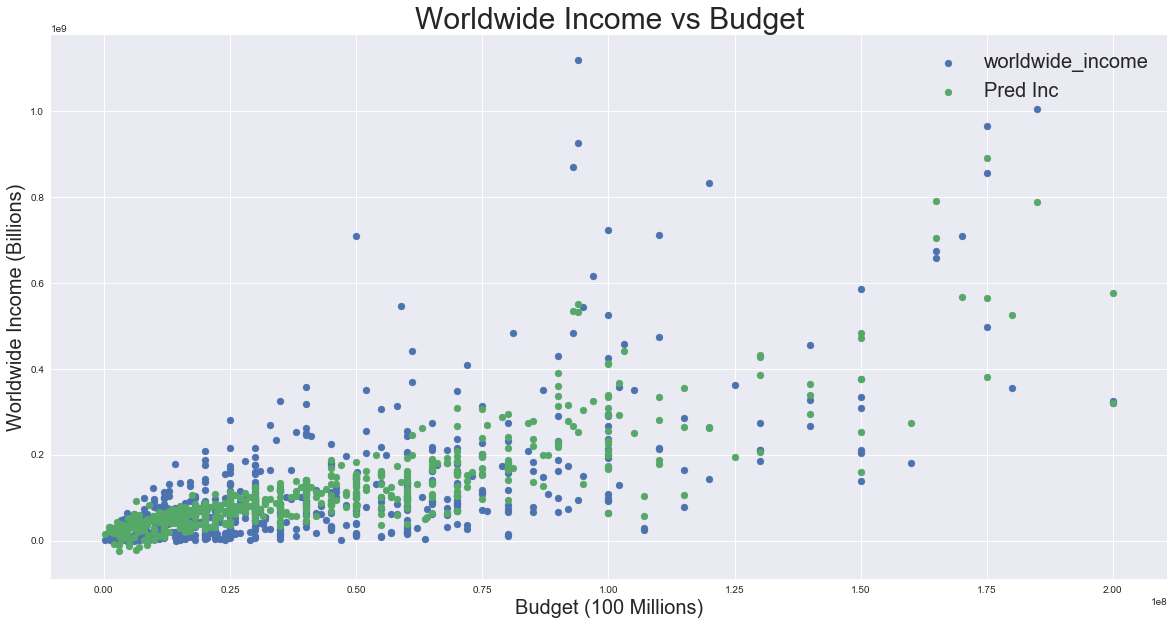

In [19]:
plt.figure(figsize = (20,10));
plt.scatter(x=IMDB.budget, y=IMDB.worldwide_income);
plt.scatter(x=IMDB.budget, y=IMDB.pred_inc5, label = 'Pred Inc')
plt.ylabel('Worldwide Income (Billions)', fontsize = 20);
plt.xlabel('Budget (100 Millions)', fontsize = 20);
plt.title('Worldwide Income vs Budget', fontsize = 30);
plt.legend(fontsize = 20);

Add optional 'Number of Voted Users' as well relationship to budget

In [20]:
stats_model6 = LinearRegression(normalize = True)
X6 = IMDB[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography',
           'romance','sport','thriller','crime','adventure','budget&director_nominee',
           'budget&actor_nominee','budget&actress_nominee','budget&comedy','budget&biography',
           'budget&romance','budget&sport','budget&thriller','budget&crime','budget&adventure','imdb_score',
           'budget&imdb','num_voted_users']]
y6 = IMDB['worldwide_income'] 
stats_model6.fit(X6, y6)
stats_model6.score(X6, y6)

0.64894858670768307

In [21]:
IMDB['budget&voters']=IMDB['budget']*IMDB['num_voted_users']

In [22]:
stats_model7 = LinearRegression()
X7 = IMDB[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography',
           'romance','sport','thriller','crime','adventure','budget&director_nominee',
           'budget&actor_nominee','budget&actress_nominee','imdb_score','budget&imdb',
           'num_voted_users','budget&voters','budget&comedy','budget&biography','budget&romance','budget&sport','budget&thriller','budget&crime','budget&adventure']]
y7 = IMDB['worldwide_income'] 
stats_model7.fit(X7, y7)
stats_model7.score(X7, y7), stats_model7.coef_

(0.66050035929709994,
 array([ -1.69322177e-02,   4.32937346e+06,   1.11639234e+07,
          1.09399180e+07,  -6.91377649e+06,   1.12999124e+07,
          6.46651156e+06,   2.19630928e+07,  -1.57699866e+07,
          7.72963709e+06,  -1.13881640e+07,  -4.56656819e-02,
         -8.12250782e-01,   4.50933222e-02,  -1.56250449e+07,
          2.65408706e-01,   1.49707048e+02,   2.00886279e-06,
          2.45732982e-01,   1.42037536e-01,   5.76254576e-02,
         -7.62517169e-01,   2.85810200e-01,  -6.46356110e-01,
          8.06244943e-01]))

Add other combinations using IMDB Score

In [23]:
IMDB['imdb&director_nominee']=IMDB['imdb_score']*IMDB['director_nominee']
IMDB['imdb&actor_nominee']=IMDB['imdb_score']*IMDB['actor_nominee']
IMDB['imdb&actress_nominee']=IMDB['imdb_score']*IMDB['actress_nominee']
IMDB['imdb&comedy']=IMDB['imdb_score']*IMDB['comedy']
IMDB['imdb&biography']=IMDB['imdb_score']*IMDB['biography']
IMDB['imdb&romance']=IMDB['imdb_score']*IMDB['romance']
IMDB['imdb&sport']=IMDB['imdb_score']*IMDB['sport']
IMDB['imdb&thriller']=IMDB['imdb_score']*IMDB['thriller']
IMDB['imdb&crime']=IMDB['imdb_score']*IMDB['crime']
IMDB['imdb&adventure']=IMDB['imdb_score']*IMDB['adventure']

In [24]:
stats_model8 = LinearRegression(fit_intercept=True)
X8 = IMDB[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography',
           'romance','sport','thriller','crime','adventure','budget&director_nominee',
           'budget&actor_nominee','budget&actress_nominee','budget&comedy','budget&biography',
           'budget&romance','budget&sport','budget&thriller','budget&crime','budget&adventure','imdb_score','budget&imdb',
           'imdb&director_nominee','imdb&actor_nominee','imdb&actress_nominee','num_voted_users','budget&voters',
           'imdb&comedy','imdb&biography', 'imdb&romance','imdb&sport', 'imdb&thriller','imdb&crime','imdb&adventure']]
y8 = IMDB['worldwide_income'] 
stats_model8.fit(X8, y8)
stats_model8.score(X8, y8)

0.67049213721366763

In [25]:
X8P = stats_model8.predict(X8)
def r2(a,b):
    SSE = 0
    SST = 0
    for i, j in zip(a,b):
        SSE += (j - i)**2
        SST += (i - a.mean())**2 
    return 1 - SSE/SST

r2(IMDB['worldwide_income'],X8P)

0.67049213721366785

This failed to add value, so we stay with 'X5,y5' model

In [92]:
X5_I.head()

,const,budget,director_nominee,actor_nominee,actress_nominee,comedy,biography,romance,sport,thriller,...,budget&actress_nominee,budget&comedy,budget&biography,budget&romance,budget&sport,budget&thriller,budget&crime,budget&adventure,imdb_score,budget&imdb
0,1.0,90000000,1,0,0,0,0,0,0,1,...,0,0,0,0,0,90000000,90000000,0,7.1,639000000.0
1,1.0,6000000,0,1,1,0,0,1,0,0,...,6000000,0,0,6000000,0,0,0,0,7.2,43200000.0
2,1.0,34200000,0,0,0,1,0,0,0,0,...,0,34200000,0,0,0,0,0,0,6.4,218880000.0
3,1.0,10500000,0,0,1,0,0,1,0,0,...,10500000,0,0,10500000,0,0,0,0,6.8,71400000.0
4,1.0,25000000,0,0,0,1,0,1,0,0,...,0,25000000,0,25000000,0,0,0,0,6.0,150000000.0


In [26]:
X5_I = sm.tools.add_constant(X5)
model_p = sm.OLS(y5,X5_I)
model_p.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       worldwide_income   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     33.22
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.17e-89
Time:                        12:46:53   Log-Likelihood:                -11748.
No. Observations:                 593   AIC:                         2.354e+04
Df Residuals:                     569   BIC:                         2.365e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.481e+08   5.91e+07      2.505      0.013     3.2e+07    2.64e+08
budget                     -5.5651      1.022     -5.447      0.000      -7.572      -3.558
director_nominee         3.867e+07   3.24e+07      1.194      0.233   -2.49e+07    1.02e+08
actor_nominee            1.523e+07   1.39e+07      1.092      0.275   -1.22e+07    4.26e+07
actress_nominee          4.934e+06   1.36e+07      0.363      0.717   -2.18e+07    3.16e+07
comedy                  -3.552e+05   1.62e+07     -0.022      0.983   -3.23e+07    3.15e+07
biography                  1.3e+07   2.39e+07      0.544      0.587   -3.39e+07    5.99e+07
romance                  3.823e+05   1.53e+07      0.025      0.980   -2.96e+07    3.04e+07
sport                    2.794e+07   4.04e+07      0.692      0.489   -5.13e+07    1.07e+08
thriller                 -3.55e+07   1.76e+07     -2.020      0.044      -7e+07   -9.81e+05
crime                    -1.02e+07   1.91e+07     -0.533      0.594   -4.78e+07    2.74e+07
adventure               -4.479e+06   2.15e+07     -0.208      0.835   -4.68e+07    3.78e+07
budget&director_nominee    -0.7949      0.539     -1.474      0.141      -1.854       0.265
budget&actor_nominee       -0.9254      0.258     -3.586      0.000      -1.432      -0.418
budget&actress_nominee      0.3659      0.248      1.476      0.141      -0.121       0.853
budget&comedy              -0.1096      0.315     -0.348      0.728      -0.729       0.509
budget&biography           -0.4276      0.516     -0.828      0.408      -1.441       0.586
budget&romance              0.1221      0.289      0.422      0.673      -0.446       0.690
budget&sport               -1.1685      0.873     -1.338      0.181      -2.884       0.547
budget&thriller             0.6748      0.313      2.157      0.031       0.060       1.289
budget&crime               -0.1187      0.380     -0.312      0.755      -0.865       0.628
budget&adventure            0.8902      0.279      3.191      0.001       0.342       1.438
imdb_score              -1.883e+07   8.07e+06     -2.334      0.020   -3.47e+07   -2.99e+06
budget&imdb                 1.1648      0.136      8.561      0.000       0.898       1.432
==============================================================================
Omnibus:                      291.119   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2603.172
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      12.476   Cond. No.                     6.06e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numb

Plot resuduals to look for discrepancies

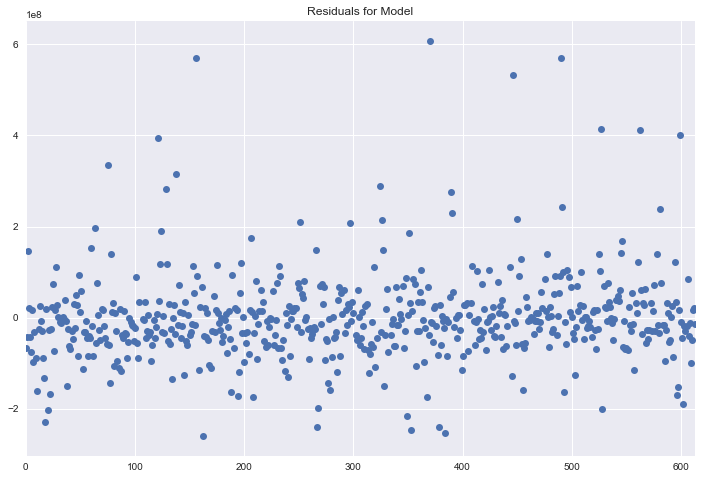

In [27]:
residual_set = sm.OLS(y5,X5_I)
residual_fit = residual_set.fit();
residual_fit.resid.plot(style='o', figsize=(12,8), title = 'Residuals for Model');

In [28]:
IMDB['resid'] = IMDB['worldwide_income'] - IMDB['pred_inc5']

The residuals look as close to a normal distribution as we could get with a small data set

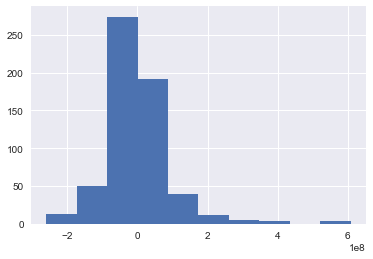

In [29]:
plt.hist(IMDB['resid']);

The qq plot confirms the above

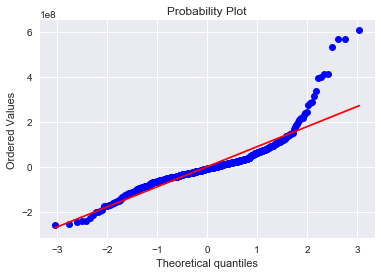

In [30]:
stats.probplot(IMDB['resid'], dist="norm", plot=plt);
plt.show();

Run Test Train Split to look for variances in R^2

In [88]:
def test_train_split(X5,y5):
    X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr.score(X_test, y_test), lr.score(X_train, y_train)

def test_train_iterations(X5,y5,z): 
    for i in range(z):
        print(test_train_split(X5,y5))

test_train_iterations(X5,y5,10)

(0.58260474028485387, 0.53870057362376844)
(0.42053706853527306, 0.62068650637827438)
(0.6620005160965674, 0.48763700368514395)
(0.45348809358465192, 0.60482397006439426)
(0.45037182504600276, 0.58723253548602639)
(0.41581986482835942, 0.61118029252333872)
(0.55654881775479814, 0.56561262143392721)
(0.57778885122069745, 0.56061786143241799)
(0.48044733056780264, 0.59706650545893547)
(0.52688782072930573, 0.58491501049914407)


The train test splits show that there is no overfit. The only inconsistency could be attributed to outliers 

In [116]:
scaler = MinMaxScaler()
X15 = scaler.fit_transform(X5)

In [117]:
X15_I = sm.tools.add_constant(X15)
model_p15 = sm.OLS(y5, X15_I)
model_p15.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       worldwide_income   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     33.22
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.17e-89
Time:                        16:20:06   Log-Likelihood:                -11748.
No. Observations:                 593   AIC:                         2.354e+04
Df Residuals:                     569   BIC:                         2.365e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.074e+08   4.22e+07      2.544      0.011    2.45e+07     1.9e+08
x1         -1.111e+09   2.04e+08     -5.447      0.000   -1.51e+09   -7.11e+08
x2          3.867e+07   3.24e+07      1.194      0.233   -2.49e+07    1.02e+08
x3          1.523e+07   1.39e+07      1.092      0.275   -1.22e+07    4.26e+07
x4          4.934e+06   1.36e+07      0.363      0.717   -2.18e+07    3.16e+07
x5         -3.552e+05   1.62e+07     -0.022      0.983   -3.23e+07    3.15e+07
x6            1.3e+07   2.39e+07      0.544      0.587   -3.39e+07    5.99e+07
x7          3.823e+05   1.53e+07      0.025      0.980   -2.96e+07    3.04e+07
x8          2.794e+07   4.04e+07      0.692      0.489   -5.13e+07    1.07e+08
x9          -3.55e+07   1.76e+07     -2.020      0.044      -7e+07   -9.81e+05
x10         -1.02e+07   1.91e+07     -0.533      0.594   -4.78e+07    2.74e+07
x11        -4.479e+06   2.15e+07     -0.208      0.835   -4.68e+07    3.78e+07
x12        -1.113e+08   7.55e+07     -1.474      0.141    -2.6e+08     3.7e+07
x13        -1.851e+08   5.16e+07     -3.586      0.000   -2.86e+08   -8.37e+07
x14         7.318e+07   4.96e+07      1.476      0.141   -2.42e+07    1.71e+08
x15        -1.919e+07   5.51e+07     -0.348      0.728   -1.27e+08    8.91e+07
x16        -4.703e+07   5.68e+07     -0.828      0.408   -1.59e+08    6.45e+07
x17         2.442e+07   5.79e+07      0.422      0.673   -8.92e+07    1.38e+08
x18         -1.25e+08   9.35e+07     -1.338      0.181   -3.09e+08    5.85e+07
x19         1.248e+08   5.79e+07      2.157      0.031    1.12e+07    2.39e+08
x20        -2.197e+07   7.03e+07     -0.312      0.755    -1.6e+08    1.16e+08
x21          1.78e+08   5.58e+07      3.191      0.001    6.85e+07    2.88e+08
x22        -1.337e+08   5.73e+07     -2.334      0.020   -2.46e+08   -2.12e+07
x23         1.937e+09   2.26e+08      8.561      0.000    1.49e+09    2.38e+09
==============================================================================
Omnibus:                      291.119   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2603.172
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      12.476   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
IMDB_log = IMDB

In [33]:
IMDB_log['worldwide_income_log'] = IMDB_log['worldwide_income'].apply(lambda x: np.log(x))

(array([   3.,    4.,   12.,   26.,   58.,   76.,  168.,  161.,   66.,   19.]),
 array([ 12.5058809 ,  13.33894597,  14.17201104,  15.00507611,
         15.83814118,  16.67120625,  17.50427131,  18.33733638,
         19.17040145,  20.00346652,  20.83653159]),
 <a list of 10 Patch objects>)

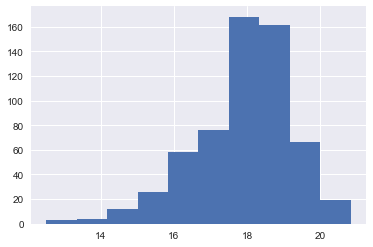

In [34]:
plt.hist(IMDB['worldwide_income_log'])

Run test train split on model

In [35]:
X9 = IMDB_log[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography',
       'romance','sport','thriller','crime','adventure','budget&director_nominee','budget&actor_nominee','budget&actress_nominee','budget&comedy','budget&biography',
       'budget&romance','budget&sport','budget&thriller','budget&crime','budget&adventure','imdb_score','budget&imdb']]

y9 = IMDB_log['worldwide_income_log'] 

def test_train_split(X9,y9):
    X_train, X_test, y_train, y_test = train_test_split(X9, y9, test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr.score(X_test, y_test), lr.score(X_train, y_train)

test_train_split(X9,y9)



(0.25468000758961507, 0.42235529005627714)

Transform predicted Y and compare with original Y

In [49]:
stats_model9 = LinearRegression(fit_intercept=True)
stats_model9.fit(X9,y9)
IMDB_log['pred_income_log'] = stats_model9.predict(X9)
IMDB_log['pred_income'] = IMDB_log['pred_income_log'].apply(lambda x: np.exp(x))
def r2(a,b):
    SSE = 0
    SST = 0
    for i, j in zip(a,b):
        SSE += (j - i)**2
        SST += (i - a.mean())**2 
    return 1 - SSE/SST

r2(IMDB_log['worldwide_income'],IMDB_log['pred_income'])

-1.4715536492428476

The R^2 does not look favorable. Now looking at distribution of residuals

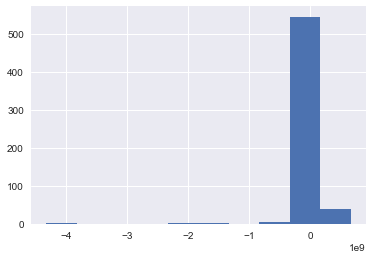

In [40]:
IMDB_log['resid'] = IMDB_log['worldwide_income'] - IMDB_log['pred_income'];
plt.hist(IMDB_log['resid']);

The data is not normally distributed, although the model is worth further exploration. Let's transform features as well.

In [43]:
IMDB_log2 = IMDB
IMDB_log2['worldwide_income_log'] = IMDB_log2['worldwide_income'].apply(lambda x: np.log(x))
IMDB_log2['budget_log'] = IMDB_log2['budget'].apply(lambda x: np.log(x))

In [44]:
IMDB_log2['budget&director_nominee_log']=IMDB_log2['budget_log']*IMDB_log2['director_nominee']
IMDB_log2['budget&actor_nominee_log']=IMDB_log2['budget_log']*IMDB_log2['actor_nominee']
IMDB_log2['budget&actress_nominee_log']=IMDB_log2['budget_log']*IMDB_log2['actress_nominee']
IMDB_log2['budget&comedy_log']=IMDB_log2['budget_log']*IMDB_log2['comedy']
IMDB_log2['budget&biography_log']=IMDB_log2['budget_log']*IMDB_log2['biography']
IMDB_log2['budget&romance_log']=IMDB_log2['budget_log']*IMDB_log2['romance']
IMDB_log2['budget&sport_log']=IMDB_log2['budget_log']*IMDB_log2['sport']
IMDB_log2['budget&thriller_log']=IMDB_log2['budget_log']*IMDB_log2['thriller']
IMDB_log2['budget&crime_log']=IMDB_log2['budget_log']*IMDB_log2['crime']
IMDB_log2['budget&adventure_log']=IMDB_log2['budget_log']*IMDB_log2['adventure']
IMDB_log2['imdb&director_nominee']=IMDB_log2['imdb_score']*IMDB_log2['director_nominee']
IMDB_log2['imdb&actor_nominee']=IMDB_log2['imdb_score']*IMDB_log2['actor_nominee']
IMDB_log2['imdb&actress_nominee_log']=IMDB_log2['imdb_score']*IMDB_log2['actress_nominee']
IMDB_log2['imdb&comedy']=IMDB_log2['imdb_score']*IMDB_log2['comedy']
IMDB_log2['imdb&biography']=IMDB_log2['imdb_score']*IMDB_log2['biography']
IMDB_log2['imdb&romance']=IMDB_log2['imdb_score']*IMDB_log2['romance']
IMDB_log2['imdb&sport']=IMDB_log2['imdb_score']*IMDB_log2['sport']
IMDB_log2['imdb&thriller']=IMDB_log2['imdb_score']*IMDB_log2['thriller']
IMDB_log2['imdb&crime']=IMDB_log2['imdb_score']*IMDB_log2['crime']
IMDB_log2['imdb&adventure']=IMDB_log2['imdb_score']*IMDB_log2['adventure']
IMDB_log2['budget&imdb_log']=IMDB_log2['budget_log']*IMDB_log2['imdb_score']
IMDB_log2['ROI_log'] = IMDB_log2['worldwide_income_log']/IMDB_log2['budget_log']

Test train split after log transformation is not favorable

In [75]:
stats_model10 = LinearRegression(fit_intercept=True)
X10 = IMDB_log[['budget_log','director_nominee','actor_nominee','actress_nominee','comedy','biography',
       'romance','sport','thriller','crime','adventure','budget&director_nominee_log','budget&actor_nominee_log','budget&actress_nominee_log','budget&comedy_log','budget&biography_log',
       'budget&romance_log','budget&sport_log','budget&thriller_log','budget&crime_log','budget&adventure_log','imdb_score','budget&imdb']]

y10 = IMDB_log['worldwide_income_log'] 

def test_train_iterations(X10,y10,z): 
    for i in range(z):
        print(test_train_split(X10,y10))

test_train_iterations(X10,y10,10)

(0.4327232369189718, 0.49603029025500267)
(0.43369805433671171, 0.48214294298323307)
(0.46596958285152656, 0.47716372726025552)
(0.38099917320320087, 0.5007187650292102)
(0.36279048383830337, 0.51226645038863916)
(0.22451477737150502, 0.56270306441959672)
(0.38887447418422438, 0.50280537848471696)
(0.54802676698979025, 0.43013511728336029)
(0.42093219933055698, 0.49673795936403869)
(0.45433884557047644, 0.48430952741573013)


However, R^2 comparison between redicted Y and original Y is now better, but not as good as my original model

In [76]:
stats_model10.fit(X10,y10)
IMDB_log['pred_income_logx'] = stats_model10.predict(X10)
IMDB_log['pred_incomex'] = IMDB_log['pred_income_logx'].apply(lambda x: np.exp(x))
r2(IMDB_log['worldwide_income'],IMDB_log['pred_incomex'])

0.51949273990768408

When transforming predicted data back to real terms, we see a decent R^2 value. Plot this new model 

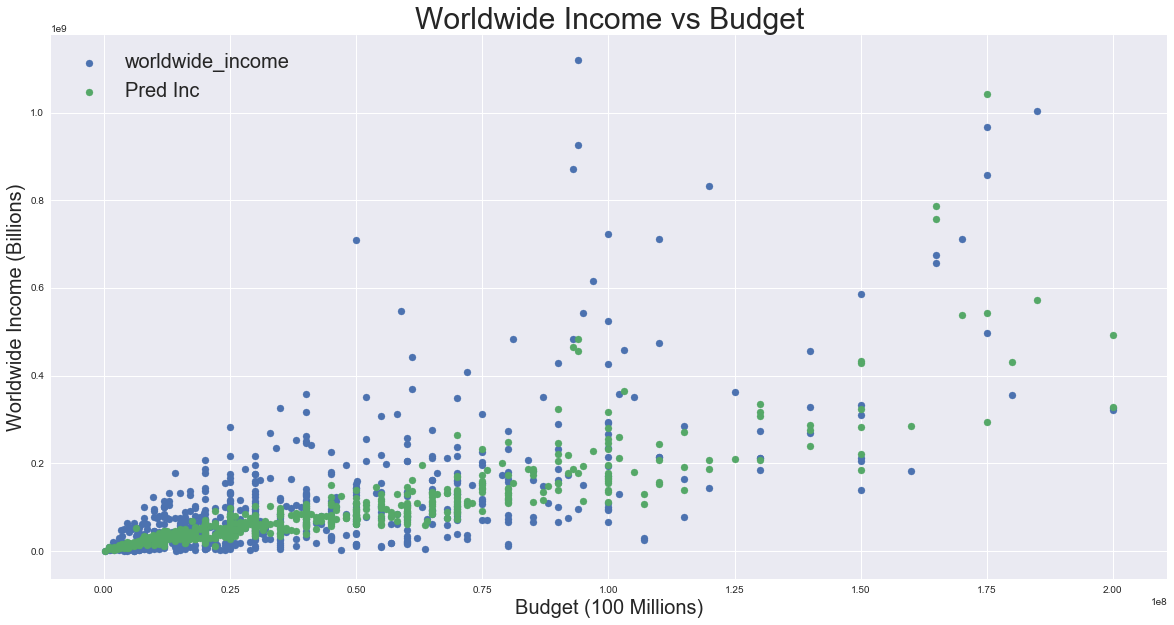

In [77]:
plt.figure(figsize = (20,10));
plt.scatter(x=IMDB.budget, y=IMDB_log.worldwide_income);
plt.scatter(x=IMDB.budget, y=IMDB_log.pred_incomex, label = 'Pred Inc')
plt.ylabel('Worldwide Income (Billions)', fontsize = 20);
plt.xlabel('Budget (100 Millions)', fontsize = 20);
plt.title('Worldwide Income vs Budget', fontsize = 30);
plt.legend(fontsize = 20);

Develop the model summary

In [73]:
X10_I = sm.tools.add_constant(X10)
model_log = sm.OLS(y10,X10_I)
model_log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     worldwide_income_log   R-squared:                       0.482
Model:                              OLS   Adj. R-squared:                  0.461
Method:                   Least Squares   F-statistic:                     22.98
Date:                  Tue, 30 Jan 2018   Prob (F-statistic):           2.01e-66
Time:                          15:37:58   Log-Likelihood:                -814.19
No. Observations:                   593   AIC:                             1676.
Df Residuals:                       569   BIC:                             1782.
Df Model:                            23                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.3178      2.170      0.607      0.544      -2.944       5.580
budget_log                      0.8532      0.123      6.964      0.000       0.613       1.094
director_nominee                7.0297      4.049      1.736      0.083      -0.923      14.982
actor_nominee                   0.0799      1.773      0.045      0.964      -3.402       3.562
actress_nominee                 1.0429      1.514      0.689      0.491      -1.931       4.017
comedy                         -0.9405      1.776     -0.530      0.597      -4.428       2.547
biography                       1.8716      2.596      0.721      0.471      -3.226       6.970
romance                         1.5762      1.691      0.932      0.352      -1.745       4.898
sport                           3.5206      4.946      0.712      0.477      -6.194      13.235
thriller                       -0.7554      1.986     -0.380      0.704      -4.657       3.146
crime                          -0.8527      2.211     -0.386      0.700      -5.195       3.490
adventure                      -3.4319      2.271     -1.511      0.131      -7.892       1.028
budget&director_nominee_log    -0.3919      0.230     -1.701      0.089      -0.844       0.061
budget&actor_nominee_log       -0.0140      0.103     -0.137      0.891      -0.216       0.188
budget&actress_nominee_log     -0.0513      0.088     -0.584      0.559      -0.224       0.121
budget&comedy_log               0.0588      0.104      0.567      0.571      -0.145       0.262
budget&biography_log           -0.1065      0.152     -0.702      0.483      -0.404       0.191
budget&romance_log             -0.0872      0.099     -0.884      0.377      -0.281       0.107
budget&sport_log               -0.2084      0.286     -0.729      0.466      -0.770       0.353
budget&thriller_log             0.0431      0.115      0.375      0.708      -0.183       0.269
budget&crime_log                0.0389      0.128      0.304      0.762      -0.213       0.291
budget&adventure_log            0.2041      0.129      1.578      0.115      -0.050       0.458
imdb_score                      0.2682      0.055      4.845      0.000       0.159       0.377
budget&imdb                  2.546e-10   3.65e-10      0.698      0.485   -4.61e-10    9.71e-10
==============================================================================
Omnibus:                       99.557   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.207
Skew:                          -1.007   Prob(JB):                     1.48e-38
Kurtosis:                       4.730   Cond. No.                     5.01e+10
==========================================================================

All in all, our original model looks best. We can also look at a Box Cox Transformation

In [118]:
IMDB_box = IMDB

In [119]:
lamb=stats.boxcox_normmax(IMDB_box['worldwide_income'], brack=(-1.9, 1.9), method='mle')
print(lamb)

0.186403177426


In [120]:
IMDB_box['income_box'] = (np.power(IMDB_box['worldwide_income'],0.178352561673)-1)/-0.178352561673

Box Cox Transformation has transformed Y accurately. However, values are negative. We are unable to transform the data back to real terms, so we will shelve this idea.

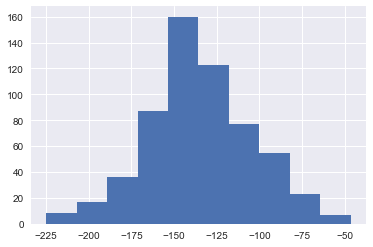

In [121]:
plt.hist(IMDB_box['income_box']);

Create new unseen data from 2017, and clean data

In [124]:
IMDB2 = pd.read_json('IMDB2.json')

IMDB2['actor_nominee'] = IMDB2.cast_list.apply(lambda x: int(bool(set(actor_list['actor']) & set(x))))
IMDB2['actress_nominee'] = IMDB2.cast_list.apply(lambda x: int(bool(set(actress_list['actress']) & set(x))))
IMDB2['director_nominee'] = IMDB2.cast_list.apply(lambda x: int(bool(set(director_list['director']) & set(x))))
IMDB2.columns.values[5] = 'genres'
IMDB2['drama'] = IMDB2.genres.apply(lambda x: int(bool(set(['Drama']) & set(x))))
IMDB2['comedy'] = IMDB2.genres.apply(lambda x: int(bool(set(['Comedy']) & set(x))))
IMDB2['romance'] = IMDB2.genres.apply(lambda x: int(bool(set(['Romance']) & set(x))))
IMDB2['biography'] = IMDB2.genres.apply(lambda x: int(bool(set(['Biography']) & set(x))))
IMDB2['sport'] = IMDB2.genres.apply(lambda x: int(bool(set(['Sport']) & set(x))))
IMDB2['thriller'] = IMDB2.genres.apply(lambda x: int(bool(set(['Thriller']) & set(x))))
IMDB2['crime'] = IMDB2.genres.apply(lambda x: int(bool(set(['Crime']) & set(x))))
IMDB2['adventure'] = IMDB2.genres.apply(lambda x: int(bool(set(['Adventure']) & set(x))))
IMDB2['num_voted_users'] = IMDB2.num_voted_users.apply(lambda x: int(''.join(x.split(','))))
IMDB2['budget&director_nominee']=IMDB2['budget']*IMDB2['director_nominee']
IMDB2['budget&actor_nominee']=IMDB2['budget']*IMDB2['actor_nominee']
IMDB2['budget&actress_nominee']=IMDB2['budget']*IMDB2['actress_nominee']
IMDB2['budget&comedy']=IMDB2['budget']*IMDB2['comedy']
IMDB2['budget&biography']=IMDB2['budget']*IMDB2['biography']
IMDB2['budget&romance']=IMDB2['budget']*IMDB2['romance']
IMDB2['budget&sport']=IMDB2['budget']*IMDB2['sport']
IMDB2['budget&thriller']=IMDB2['budget']*IMDB2['thriller']
IMDB2['budget&crime']=IMDB2['budget']*IMDB2['crime']
IMDB2['budget&adventure']=IMDB2['budget']*IMDB2['adventure']
IMDB2['imdb&director_nominee']=IMDB2['imdb_score']*IMDB2['director_nominee']
IMDB2['imdb&actor_nominee']=IMDB2['imdb_score']*IMDB2['actor_nominee']
IMDB2['imdb&actress_nominee']=IMDB2['imdb_score']*IMDB2['actress_nominee']
IMDB2['imdb&comedy']=IMDB2['imdb_score']*IMDB2['comedy']
IMDB2['imdb&biography']=IMDB2['imdb_score']*IMDB2['biography']
IMDB2['imdb&romance']=IMDB2['imdb_score']*IMDB2['romance']
IMDB2['imdb&sport']=IMDB2['imdb_score']*IMDB2['sport']
IMDB2['imdb&thriller']=IMDB2['imdb_score']*IMDB2['thriller']
IMDB2['imdb&crime']=IMDB2['imdb_score']*IMDB2['crime']
IMDB2['imdb&adventure']=IMDB2['imdb_score']*IMDB2['adventure']
IMDB2['budget&imdb']=IMDB2['budget']*IMDB2['imdb_score']
IMDB2['ROI'] = IMDB2['worldwide_income']/IMDB2['budget']

In [125]:
IMDB2 = IMDB2[IMDB2['ROI'] < 15]

Run chosen model on unseen data

In [126]:
X13 = IMDB2[['budget','director_nominee','actor_nominee','actress_nominee','comedy','biography',
           'romance','sport','thriller','crime','adventure','budget&director_nominee',
           'budget&actor_nominee','budget&actress_nominee','budget&comedy','budget&biography',
           'budget&romance','budget&sport','budget&thriller','budget&crime','budget&adventure','imdb_score','budget&imdb']]
y13 = IMDB2['worldwide_income']
IMDB2['pred_gross'] = stats_model5.predict(X13)

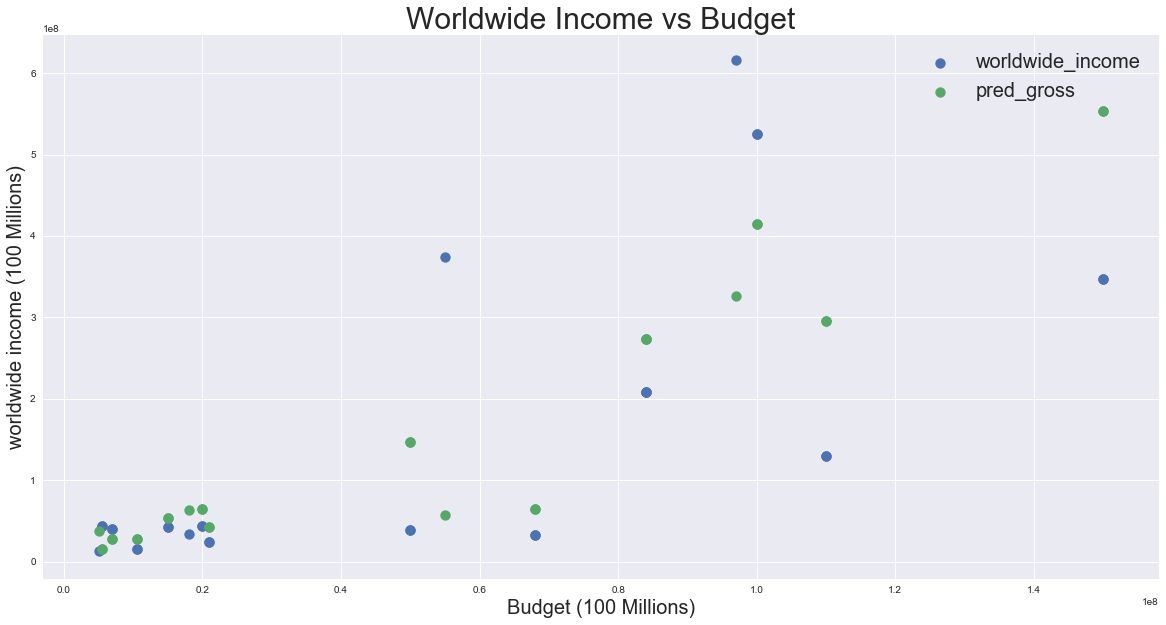

In [127]:
plt.figure(figsize = (20,10));
plt.scatter(x=IMDB2.budget, y=IMDB2.worldwide_income, s=100);
plt.scatter(x=IMDB2.budget, y=IMDB2.pred_gross, s = 100);
plt.ylabel('worldwide income (100 Millions)', fontsize = 20);
plt.xlabel('Budget (100 Millions)', fontsize = 20);
plt.title('Worldwide Income vs Budget', fontsize = 30);
plt.legend(fontsize = 20);

We see a decent R^2 of .55 between test data and model

In [128]:
stats_model5.score(X13, y13)

0.55389789778568876